In [12]:
# Instalasi library pyswarm yang digunakan untuk implementasi algoritma PSO.
!pip install pyswarm

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
pengunjung = pd.read_csv("Pengunjung_Mall.csv")    #membaca file csv dengan nama menggunakan library pandas dan menyimpannya dalam variabel pengunjung
print(pengunjung.head())

#Preprocessing yaitu mengubah nama kolom agar lebih seragam. Lalu kolom gender adalah kolom kategorik, maka kita akan mengubah data tersebut menjadi data numerik.
# ubah nama kolom
df = pengunjung.rename(columns={'Gender': 'gender', 'Usia': 'Usia',
                        'Pendapatan_Tahunan_Ribuan_USD': 'Pendapatan_Tahunan_Ribuan_USD',
                        'Pengeluaran_USD': 'Pengeluaran_USD'})

   ID_Pelanggan  Gender  Usia  Pendapatan_Tahunan_Ribuan_USD  Pengeluaran_USD
0             1    Pria    19                             15               39
1             2    Pria    21                             15               81
2             3  Wanita    20                             16                6
3             4  Wanita    23                             16               77
4             5  Wanita    31                             17               40


In [3]:
# Mengubah data gender
df['gender'].replace(['Wanita', 'Pria'], [0,1], inplace=True)
print(df.head(5))

   ID_Pelanggan  gender  Usia  Pendapatan_Tahunan_Ribuan_USD  Pengeluaran_USD
0             1       1    19                             15               39
1             2       1    21                             15               81
2             3       0    20                             16                6
3             4       0    23                             16               77
4             5       0    31                             17               40


In [4]:
#Pilih data yang akan masuk dalam clustering
X = df[["Pendapatan_Tahunan_Ribuan_USD", "Pengeluaran_USD"]] #data yang akan dijadikan input untuk algoritma K-Means
print(X.head(5))

   Pendapatan_Tahunan_Ribuan_USD  Pengeluaran_USD
0                             15               39
1                             15               81
2                             16                6
3                             16               77
4                             17               40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,ID_Pelanggan,gender,Usia,Pendapatan_Tahunan_Ribuan_USD,Pengeluaran_USD,cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,4
3,4,0,23,16,77,1
4,5,0,31,17,40,4


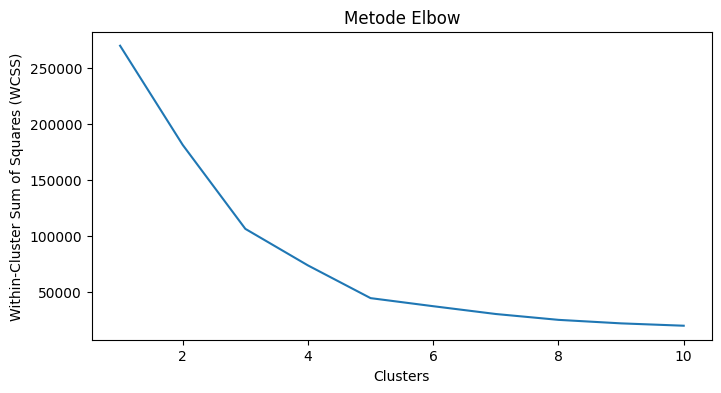

In [5]:
from sklearn.cluster import KMeans #Library dan modul yang diperlukan untuk implementasi K-Means clustering
import matplotlib.pyplot as plt
import seaborn as sns
# Menentukan nilai K optimal dengan metode Elbow
clusters = []
for i in range(1, 11):    #Menggunakan metode Elbow, nilai inersia (Within-Cluster Sum of Squares) dihitung untuk setiap nilai K dari 1 hingga 10
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

# Membuat plot inertia, Menggunakan matplotlib dan seaborn, sebuah plot dibuat untuk membantu menentukan nilai K yang optimal (nilai di mana inersia mulai menurun secara signifikan)
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Metode Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Within-Cluster Sum of Squares (WCSS)')

# Pilih nilai K optimal
k_optimal =5  # Sesuaikan dengan nilai K yang Anda pilih dari plot Elbow

# Melatih model K-Means dengan nilai K optimal, Model K-Means dilatih menggunakan nilai K optimal, dan kolom baru 'cluster' ditambahkan ke dataframe df untuk menyimpan hasil klasterisasi.
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Menampilkan data setelah clustering
df.head()

In [22]:
from sklearn.metrics import davies_bouldin_score #DBI score

# Menentukan nilai K optimal
k_optimal = 5

# Melatih model K-Means dengan nilai K optimal, dan pusat klaster diambil dari kmeans.cluster_centers
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_

# Calculate the Davies-Bouldin Index
labels = kmeans.fit_predict(X)
db_index = davies_bouldin_score(X, labels)

# Print the Davies-Bouldin Index
print("DBI Score untuk klustering sebelum PSO:", db_index)

# Menampilkan nilai pusat dari setiap centroid, Ini memberikan gambaran tentang lokasi pusat dari masing-masing klaster dalam ruang fitur.
for i, center in enumerate(cluster_centers):
    print(f'Centroid {i + 1}: ({center[0]}, {center[1]})')

# Menampilkan data setelah clustering,  Kolom 'cluster' menunjukkan klaster yang telah ditetapkan untuk setiap data.
df.head()
# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, df['cluster'], test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBI Score untuk klustering sebelum PSO: 0.5725628995597081
Centroid 1: (55.29629629629632, 49.51851851851852)
Centroid 2: (88.20000000000002, 17.1142857142857)
Centroid 3: (26.304347826086982, 20.913043478260867)
Centroid 4: (25.727272727272755, 79.36363636363636)
Centroid 5: (86.53846153846155, 82.12820512820511)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


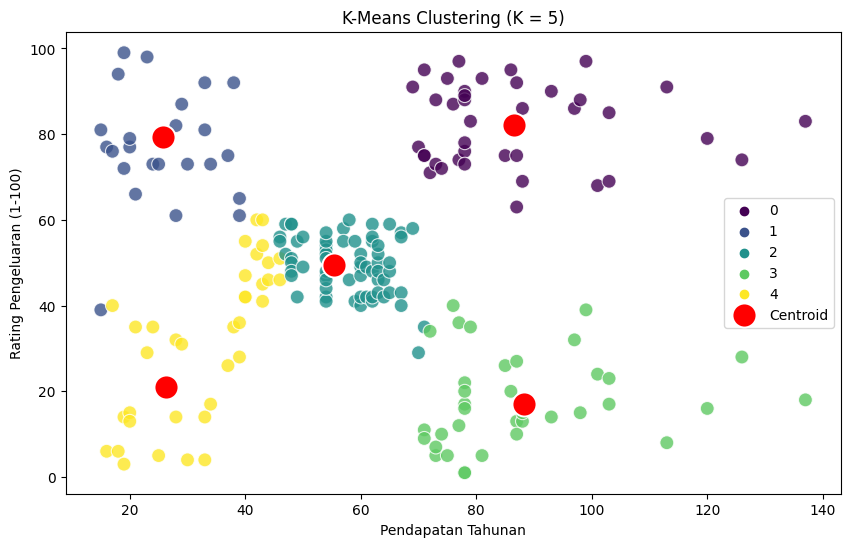

In [8]:
# Membuat plot K-Means dengan 5 cluster
plt.figure(figsize=(10, 6))

# Membuat scatter plot untuk data dengan menggunakan seaborn,
sns.scatterplot(x='Pendapatan_Tahunan_Ribuan_USD', y='Pengeluaran_USD', hue='cluster', data=df, palette='viridis', s=100, alpha=0.8)

#  centroid dari masing-masing klaster ditandai dengan lingkaran merah
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='o', s=300, label='Centroid')
#(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)

plt.title(f'K-Means Clustering (K = {k_optimal})')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.legend()
plt.show()

In [13]:
# Import library yang diperlukan
from pyswarm import pso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Fungsi objektif untuk PSO
def objective_function(params):
    n_neighbors, weights = params
    knn = KNeighborsClassifier(n_neighbors=int(n_neighbors), weights='uniform' if weights < 0.5 else 'distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # Minimalkan nilai akurasi (gunakan negatif karena PSO mencari nilai minimum)

# Menentukan batas bawah (lower bound) dan batas atas (upper bound) untuk setiap parameter
lb = [1, 0]  # Misalnya, n_neighbors tidak boleh kurang dari 1, dan weights antara 0 dan 1
ub = [10, 1]  # Misalnya, n_neighbors tidak boleh lebih dari 10, dan weights antara 0 dan 1

# Menjalankan PSO
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)

# Menampilkan hasil optimal
print("Best Parameters (n_neighbors, weights):", best_params)

# Melatih kNN dengan parameter optimal
best_n_neighbors, best_weights = best_params
knn_optimal = KNeighborsClassifier(n_neighbors=int(best_n_neighbors), weights='uniform' if best_weights < 0.5 else 'distance')
knn_optimal.fit(X_train, y_train)

# Melakukan prediksi
y_pred_optimal = knn_optimal.predict(X_test)

# Menampilkan akurasi dari model kNN yang dioptimalkan
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print("Optimized kNN Accuracy:", accuracy_optimal)

Stopping search: maximum iterations reached --> 10
Best Parameters (n_neighbors, weights): [4.73751108 0.23581217]
Optimized kNN Accuracy: 1.0


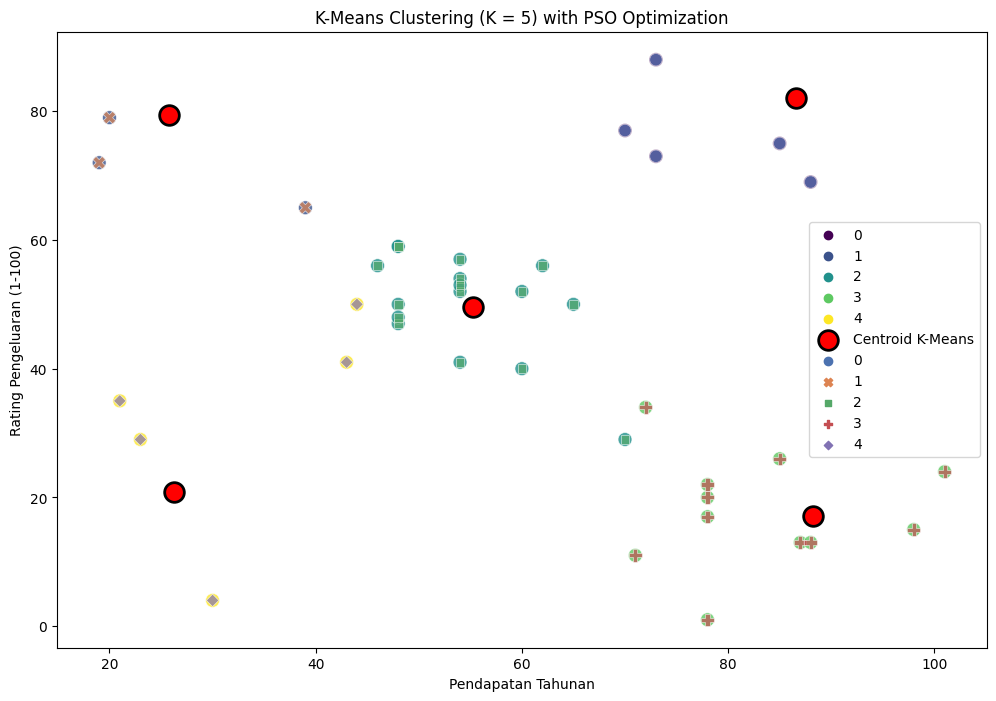

In [16]:
# Membuat plot K-Means dengan 5 cluster dan hasil optimasi PSO
plt.figure(figsize=(12, 8))

# Scatter plot untuk hasil optimasi
sns.scatterplot(x='Pendapatan_Tahunan_Ribuan_USD', y='Pengeluaran_USD', hue=y_pred_optimal, data=X_test, palette='viridis', s=100, alpha=0.8, edgecolor='w', linewidth=0.5)

# Scatter plot untuk centroid K-Means
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='o', s=200, label='Centroid K-Means', edgecolor='black', linewidth=2)
#Dalam kodingan di atas, saya melakukan beberapa perubahan, antara lain: Mengatur edgecolor untuk memberikan warna tepi marker. Mengatur linewidth untuk mengubah ketebalan tepi marker.Mengatur style pada scatter plot hasil optimasi dengan menggunakan nilai klaster sebagai bentuk marker yang berbeda.

# Plot optimal PSO
sns.scatterplot(x=X_test['Pendapatan_Tahunan_Ribuan_USD'], y=X_test['Pengeluaran_USD'], hue=y_pred_optimal, palette='deep', s=80, alpha=0.7, edgecolor='w', linewidth=0.5, style=y_pred_optimal)

plt.title(f'K-Means Clustering (K = {k_optimal}) with PSO Optimization')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.legend()
plt.show()

#Beberapa catatan tentang kodingan di atas:

#sns.scatterplot digunakan untuk membuat scatter plot. Perhatikan penggunaan hue untuk membedakan warna berdasarkan prediksi klaster dari kNN yang dioptimalkan dengan PSO.
#Scatter plot untuk centroid K-Means ditambahkan untuk membandingkan hasil klasterisasi dari K-Means dengan hasil klasterisasi dari kNN yang dioptimalkan.
#label digunakan untuk memberi label pada setiap elemen plot, dan legend ditambahkan untuk menunjukkan keterangan pada plot.
#Pastikan untuk menyesuaikan parameter plot sesuai dengan kebutuhan dan preferensi visual Anda. Anda dapat mengeksplorasi variasi warna, ukuran, dan transparansi untuk membuat visualisasi yang informatif.

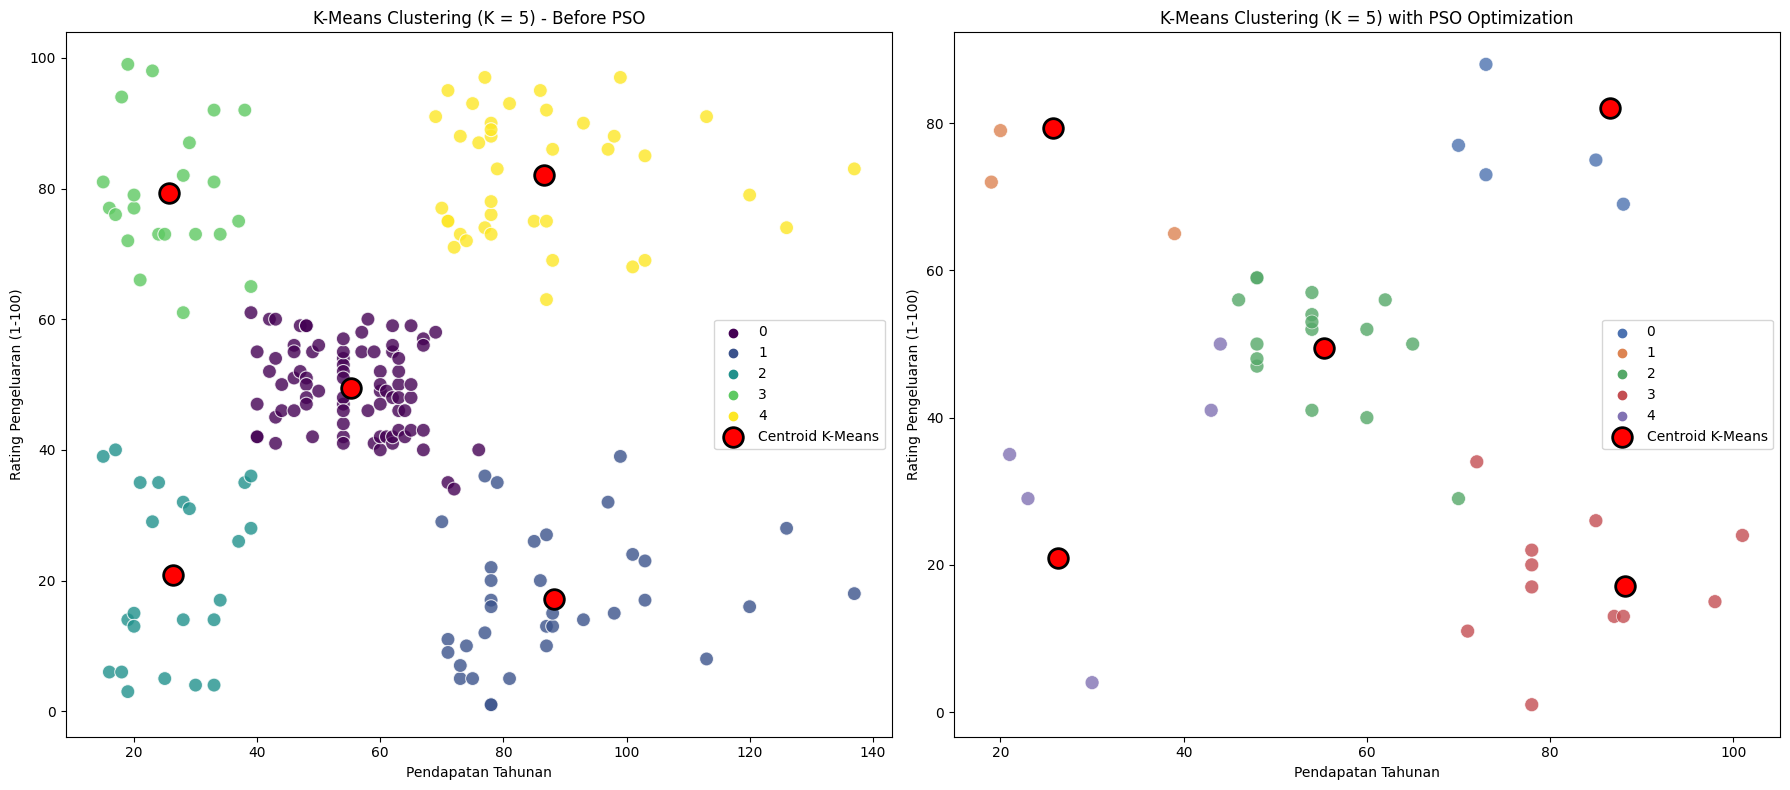

In [17]:
# Membuat plot K-Means dengan 5 cluster dan hasil optimasi PSO
plt.figure(figsize=(18, 8))

# Plot sebelum optimasi
plt.subplot(1, 2, 1)
sns.scatterplot(x='Pendapatan_Tahunan_Ribuan_USD', y='Pengeluaran_USD', hue=kmeans.labels_, data=df, palette='viridis', s=100, alpha=0.8)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='o', s=200, label='Centroid K-Means', edgecolor='black', linewidth=2)
plt.title(f'K-Means Clustering (K = {k_optimal}) - Before PSO')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.legend()

# Plot setelah optimasi PSO
plt.subplot(1, 2, 2)
sns.scatterplot(x='Pendapatan_Tahunan_Ribuan_USD', y='Pengeluaran_USD', hue=y_pred_optimal, data=X_test, palette='deep', s=100, alpha=0.8, edgecolor='w', linewidth=0.5)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='o', s=200, label='Centroid K-Means', edgecolor='black', linewidth=2)
plt.title(f'K-Means Clustering (K = {k_optimal}) with PSO Optimization')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Rating Pengeluaran (1-100)')
plt.legend()

plt.tight_layout()
plt.show()



#Dalam kodingan di atas, plt.subplot(1, 2, 1) menunjukkan bahwa kita ingin membuat dua subplot dalam satu baris dan dua kolom, dan kita sedang berada di subplot pertama.
#plt.subplot(1, 2, 2) menunjukkan bahwa kita sedang berada di subplot kedua
#Fungsi plt.tight_layout() digunakan untuk mengoptimalkan tata letak (layout) dari elemen-elemen pada plot sehingga tidak ada tumpang tindih di antara mereka.
#Ini membantu memastikan bahwa elemen-elemen pada subplot, seperti label sumbu, judul plot, dan legenda, dapat ditampilkan dengan baik tanpa saling tumpang tindih.
#Ketika Anda membuat subplot atau plot dalam satu gambar (figure) dengan Seaborn atau Matplotlib, terkadang ada kebutuhan untuk menjaga jarak antara elemen-elemen tersebut agar plot terlihat lebih rapi dan mudah dibaca.
#Fungsi plt.tight_layout() otomatis mengatur jarak antar elemen-elemen tersebut